# Exploratory Data Analysis for the King County Housing Market

Author: Sebastian Nagel

## How to run this notebook

To setup your python environment and download the necessary packages, please run the following commands in your CLI of choice:

```sh
pyenv local 3.9.8
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install -r requirements.txt
```

## Aim and structure of this project

1. Explore the dataset and come up with hypotheses
1. Generate at least 3 general insights, one geographical
1. Come up with at least 3 recommendations for the stakeholder (see below)


Ask, Prepare, Process, Analyze, Conclusions / Act

Fictive stakeholder:
|Name|Stakeholder|Characteristics|
|-|-|-|
| Larry Sanders       | Buyer       | Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't his kids to play with other 

## Imports

Packages and modules needed can be installed _via_ CLI using 

```pip install -r requirements.txt```

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Dataset

Loading the data into a pandas DataFrame

In [3]:
fp = 'data/kc_house_data.csv'
df_main = pd.read_csv(fp)

### Data quality and bias

#### Quality
|Characteristic|Details|Pass|
|:-|:-|:-:|
|Reliable|Dataset generated by the government of King County|✔️|
|Original|Dataset downloaded from the government of King County|✔️|
|Comprehensive|Dataset is missing some entries|❌|
|Current|For the sake of this task, the data is considered to be current. Data is from 2016|✔️/❌|
|Cited|Dataset has been used many times and is prominently featured on kaggle.com|✔️|

#### Bias
Since this dataset is simply a representation of the King County housing market, there is arguably no bias.
However, the data collection process is unknown to the author.

### Metadata

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Fixing data types and missing/wrong data of several columns

In [5]:
# type date column as datetime object
df_main['date'] = pd.to_datetime(df_main['date'], format="%m/%d/%Y")
# type sqft_basement as numeric (will be float, because has NaNs)
df_main['sqft_basement'] = pd.to_numeric(df_main['sqft_basement'], errors='coerce')
# replace 0 with np.nan in yr_renovated (there are only few places renovated)
df_main['yr_renovated'] = df_main['yr_renovated'].replace(0.0, np.nan)

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   744 

In [6]:
df_main.describe()['sqft_above']['min']

370.0

## Hypotheses

1. Newer houses are more expensive than comparable older houses (or: the more recent a house was build, the more expensive it is)
    1. Recently renovated houses are more expensive than non-renovated houses of the same build year
1. On average housing in the city center of seattle is smaller (less rooms/sqft) than in the outskirts
1. Housing has generally gotten more expensive in 2015 compared with 2014
1. Houseprices are subject to seasons

In [7]:
df_main.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.000,1955,NaN,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.000,1965,NaN,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.000,1987,NaN,98074,47.617,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.000,2001,NaN,98053,47.656,-122.005,4760,101930
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,NaN,1995,NaN,98003,47.310,-122.327,2238,6819
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.000,1963,NaN,98198,47.410,-122.315,1650,9711
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.000,1960,NaN,98146,47.512,-122.337,1780,8113
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.000,2003,NaN,98038,47.368,-122.031,2390,7570


Hypothesis 1:

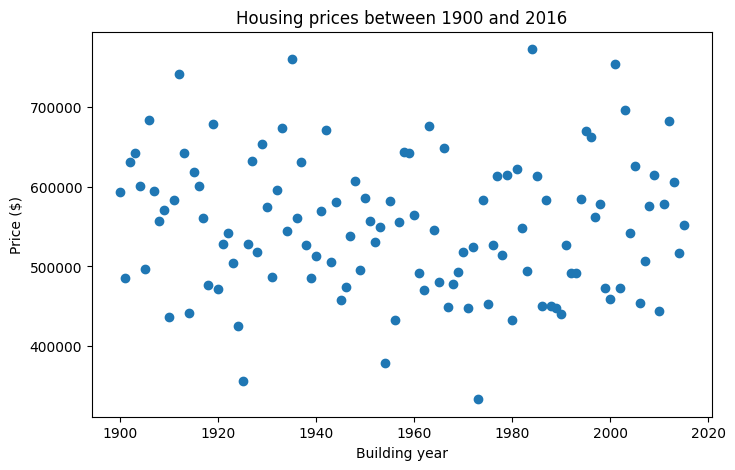

In [8]:
fig, ax = plt.subplots()
ax.scatter(df_main['yr_built'].unique(), df_main.groupby('yr_built')['price'].mean())
ax.set_xlabel('Building year')
ax.set_ylabel('Price ($)')
ax.set_title('Housing prices between 1900 and 2016')
None

Hypothesis 3:

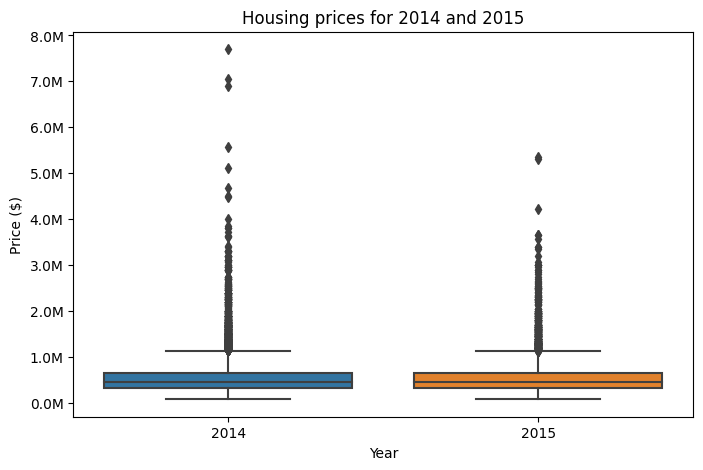

In [9]:
# generate new dataframe
df_prices_by_year = df_main.copy()
# drop everything unnecessary
for c in df_prices_by_year:
    if not c in ['id', 'date', 'price']: 
        df_prices_by_year.drop(c, axis=1, inplace=True)
# formate date column to only show years
df_prices_by_year['date'] = df_prices_by_year['date'].dt.year
# plot the results as boxplots
bp = sns.boxplot(data=df_prices_by_year, x='date', y='price')
bp.set_title('Housing prices for 2014 and 2015')
bp.set_xlabel('Year')
bp.set_ylabel('Price ($)')
xlabels = ['{}'.format(x) + 'M' for x in bp.get_yticks()/1e6]
bp.set_yticklabels(xlabels)
None

In [12]:
fig = px.scatter_mapbox(df_main, lat="lat", lon="long", #, hover_name="zipcode", hover_data=["State", "Population"],
                        color_discrete_sequence=["blue"], zoom=8.8, height=600, width=600, opacity=0.01)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Finding recommendations for stakeholder

Stakeholder wants
1. Waterfront
1. Isolated, nice, central neighborhood w/o kids

Stakeholder has
1. Limited budget
1. Kids

Additional information needed:
1. Priorities
1. Budget range
1. How many kids (or rooms)